Import

In [34]:
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from imblearn.over_sampling import SMOTE
from keras.callbacks import LearningRateScheduler
from keras.regularizers import l1
from keras.layers import LeakyReLU, ELU
from keras.regularizers import l2

Load dataset

In [35]:
data = pd.read_csv('/content/diabetes.csv')

In [36]:
# from google.colab import drive
# drive.mount('/content/drive')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [38]:
correlation_matrix = data.corr()
correlation_matrix
# Display the correlation values between features and 'Glucose'
correlation_with_glucose = correlation_matrix['Outcome'].sort_values(ascending=False)
print(correlation_with_glucose)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [39]:
correlation_threshold = 0.22
selected_features = correlation_with_glucose[abs(correlation_with_glucose) >= correlation_threshold].index
data_selected = data[selected_features]
print(data_selected.head())


   Outcome  Glucose   BMI  Age  Pregnancies
0        1      148  33.6   50            6
1        0       85  26.6   31            1
2        1      183  23.3   32            8
3        0       89  28.1   21            1
4        1      137  43.1   33            0


In [40]:
features = data_selected.drop('Outcome',axis=1)
target = data_selected['Outcome']

In [41]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(features)
#X_normalized = scaler.fit_transform(data_selected)

In [42]:
X_train,X_test,y_train, y_test = train_test_split(X_normalized,target,test_size=0.15,random_state =200)


In [43]:
oversampler = SMOTE(random_state=200)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

Build Model

In [44]:
# model = Sequential([
#     Dense(64, activation='relu', input_shape=(8,)),
#     BatchNormalization(),
#     Dropout(0.3),
#     Dense(32, activation='relu'),
#     Dropout(0.3),
#     Dense(16, activation='relu'),
#     Dropout(0.3),
#     Dense(1, activation='sigmoid')
# ])
# model.summary()

In [45]:
model = Sequential([
    Dense(256, kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dense(128, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dense(64, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dense(32, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    Dense(16, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dense(1, activation="sigmoid")
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 256)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,913 (183.25 KB)

 Trainable params: 45,985 (179.63 KB)

 Non-trainable params: 928 (3.62 KB)

In [46]:
# initial_learning_rate = 0.00001
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate,
#     decay_steps=1000,
#     decay_rate=0.95,
#     staircase=True)

In [47]:
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [48]:
def scheduler(epoch,learning_rate):
  if epoch<40:
    return 0.005
  learning_rate *= .993
  return learning_rate
lr_scheduler = LearningRateScheduler(scheduler)

In [49]:
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [50]:
history = model.fit(X_train, y_train, epochs=200, batch_size=40, validation_split=0.18, verbose=1, callbacks=[lr_scheduler,es])

Epoch 1/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 335ms/step - accuracy: 0.6446 - loss: 0.9462 - val_accuracy: 0.6695 - val_loss: 0.9144 - learning_rate: 0.0050
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7961 - loss: 0.8053 - val_accuracy: 0.7034 - val_loss: 0.8838 - learning_rate: 0.0050
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8033 - loss: 0.7577 - val_accuracy: 0.6695 - val_loss: 0.8736 - learning_rate: 0.0050
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7644 - loss: 0.7515 - val_accuracy: 0.6441 - val_loss: 0.8514 - learning_rate: 0.0050
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7835 - loss: 0.6918 - val_accuracy: 0.6271 - val_loss: 0.8304 - learning_rate: 0.0050
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7864 - loss: 0.6427 - val_accuracy: 0.5847 - val_loss: 0.8279 - learning_rate: 0.0050
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8153 - loss: 0.5904 - val_

In [51]:
model.evaluate(X_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step - accuracy: 0.7603 - loss: 0.5508


[0.5489997267723083, 0.7758620977401733]

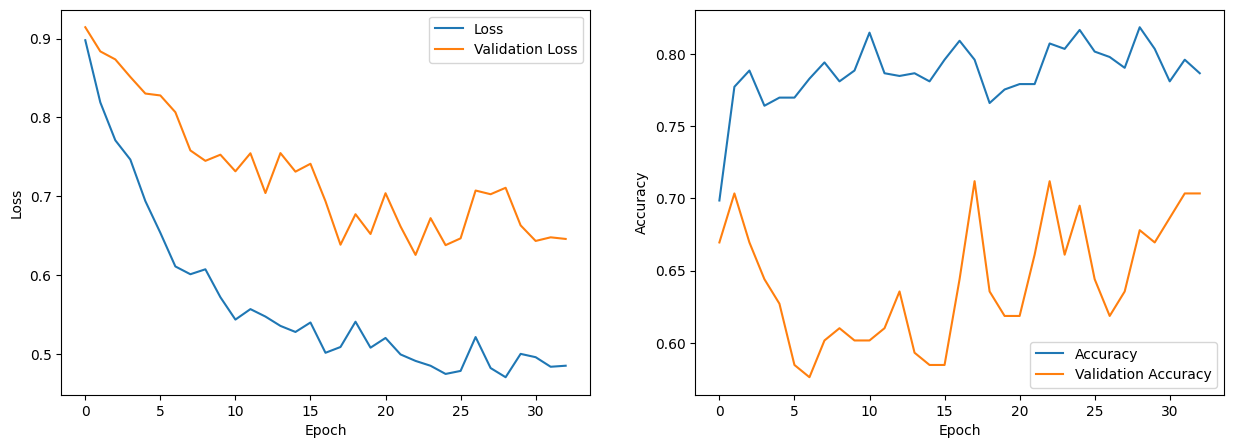

In [52]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(loss, label='Loss')
ax1.plot(val_loss, label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(accuracy, label='Accuracy')
ax2.plot(val_accuracy, label='Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

In [53]:
from sklearn.metrics import classification_report

In [54]:
# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print(report)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        78
           1       0.88      0.37      0.52        38

    accuracy                           0.78       116
   macro avg       0.82      0.67      0.69       116
weighted avg       0.80      0.78      0.74       116

